<a href="https://colab.research.google.com/github/xDanilog27/Bussiness-Inteligent/blob/main/Reto_4_Modelos_de_Agrupamiento_(Aprendizaje_No_Supervisado)_del_Reto_Parcial_I_M%C3%A9todos_de_Clasificaci%C3%B3n_(Machine_Learning).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0. Cargar las librerias



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Se procede con la implementación del modelo
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

1. Cargar la base de datos

,Age,Mother_Edu,Father_Edu,FamilySize,Self_Esteem,Height,Weight,Income,HealthPlan
1,20,5.0,8.0,5,16.0,62.0,120.0,0.0,1.0
5,19,12.0,12.0,4,27.0,64.0,200.0,40000.0,1.0
6,15,12.0,12.0,3,26.0,65.0,131.0,25000.0,1.0
7,21,9.0,6.0,3,23.0,65.0,179.0,27400.0,1.0
8,16,12.0,10.0,6,26.0,66.0,145.0,52000.0,1.0
...,...,...,...,...,...,...,...,...,...
12557,20,12.0,12.0,5,20.0,60.0,110.0,1000.0,1.0
12565,20,12.0,11.0,2,24.0,63.0,152.0,38000.0,1.0
12647,21,16.0,12.0,1,30.0,70.0,180.0,43600.0,1.0
12651,21,16.0,16.0,1,27.0,73.0,170.0,40000.0,1.0


/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


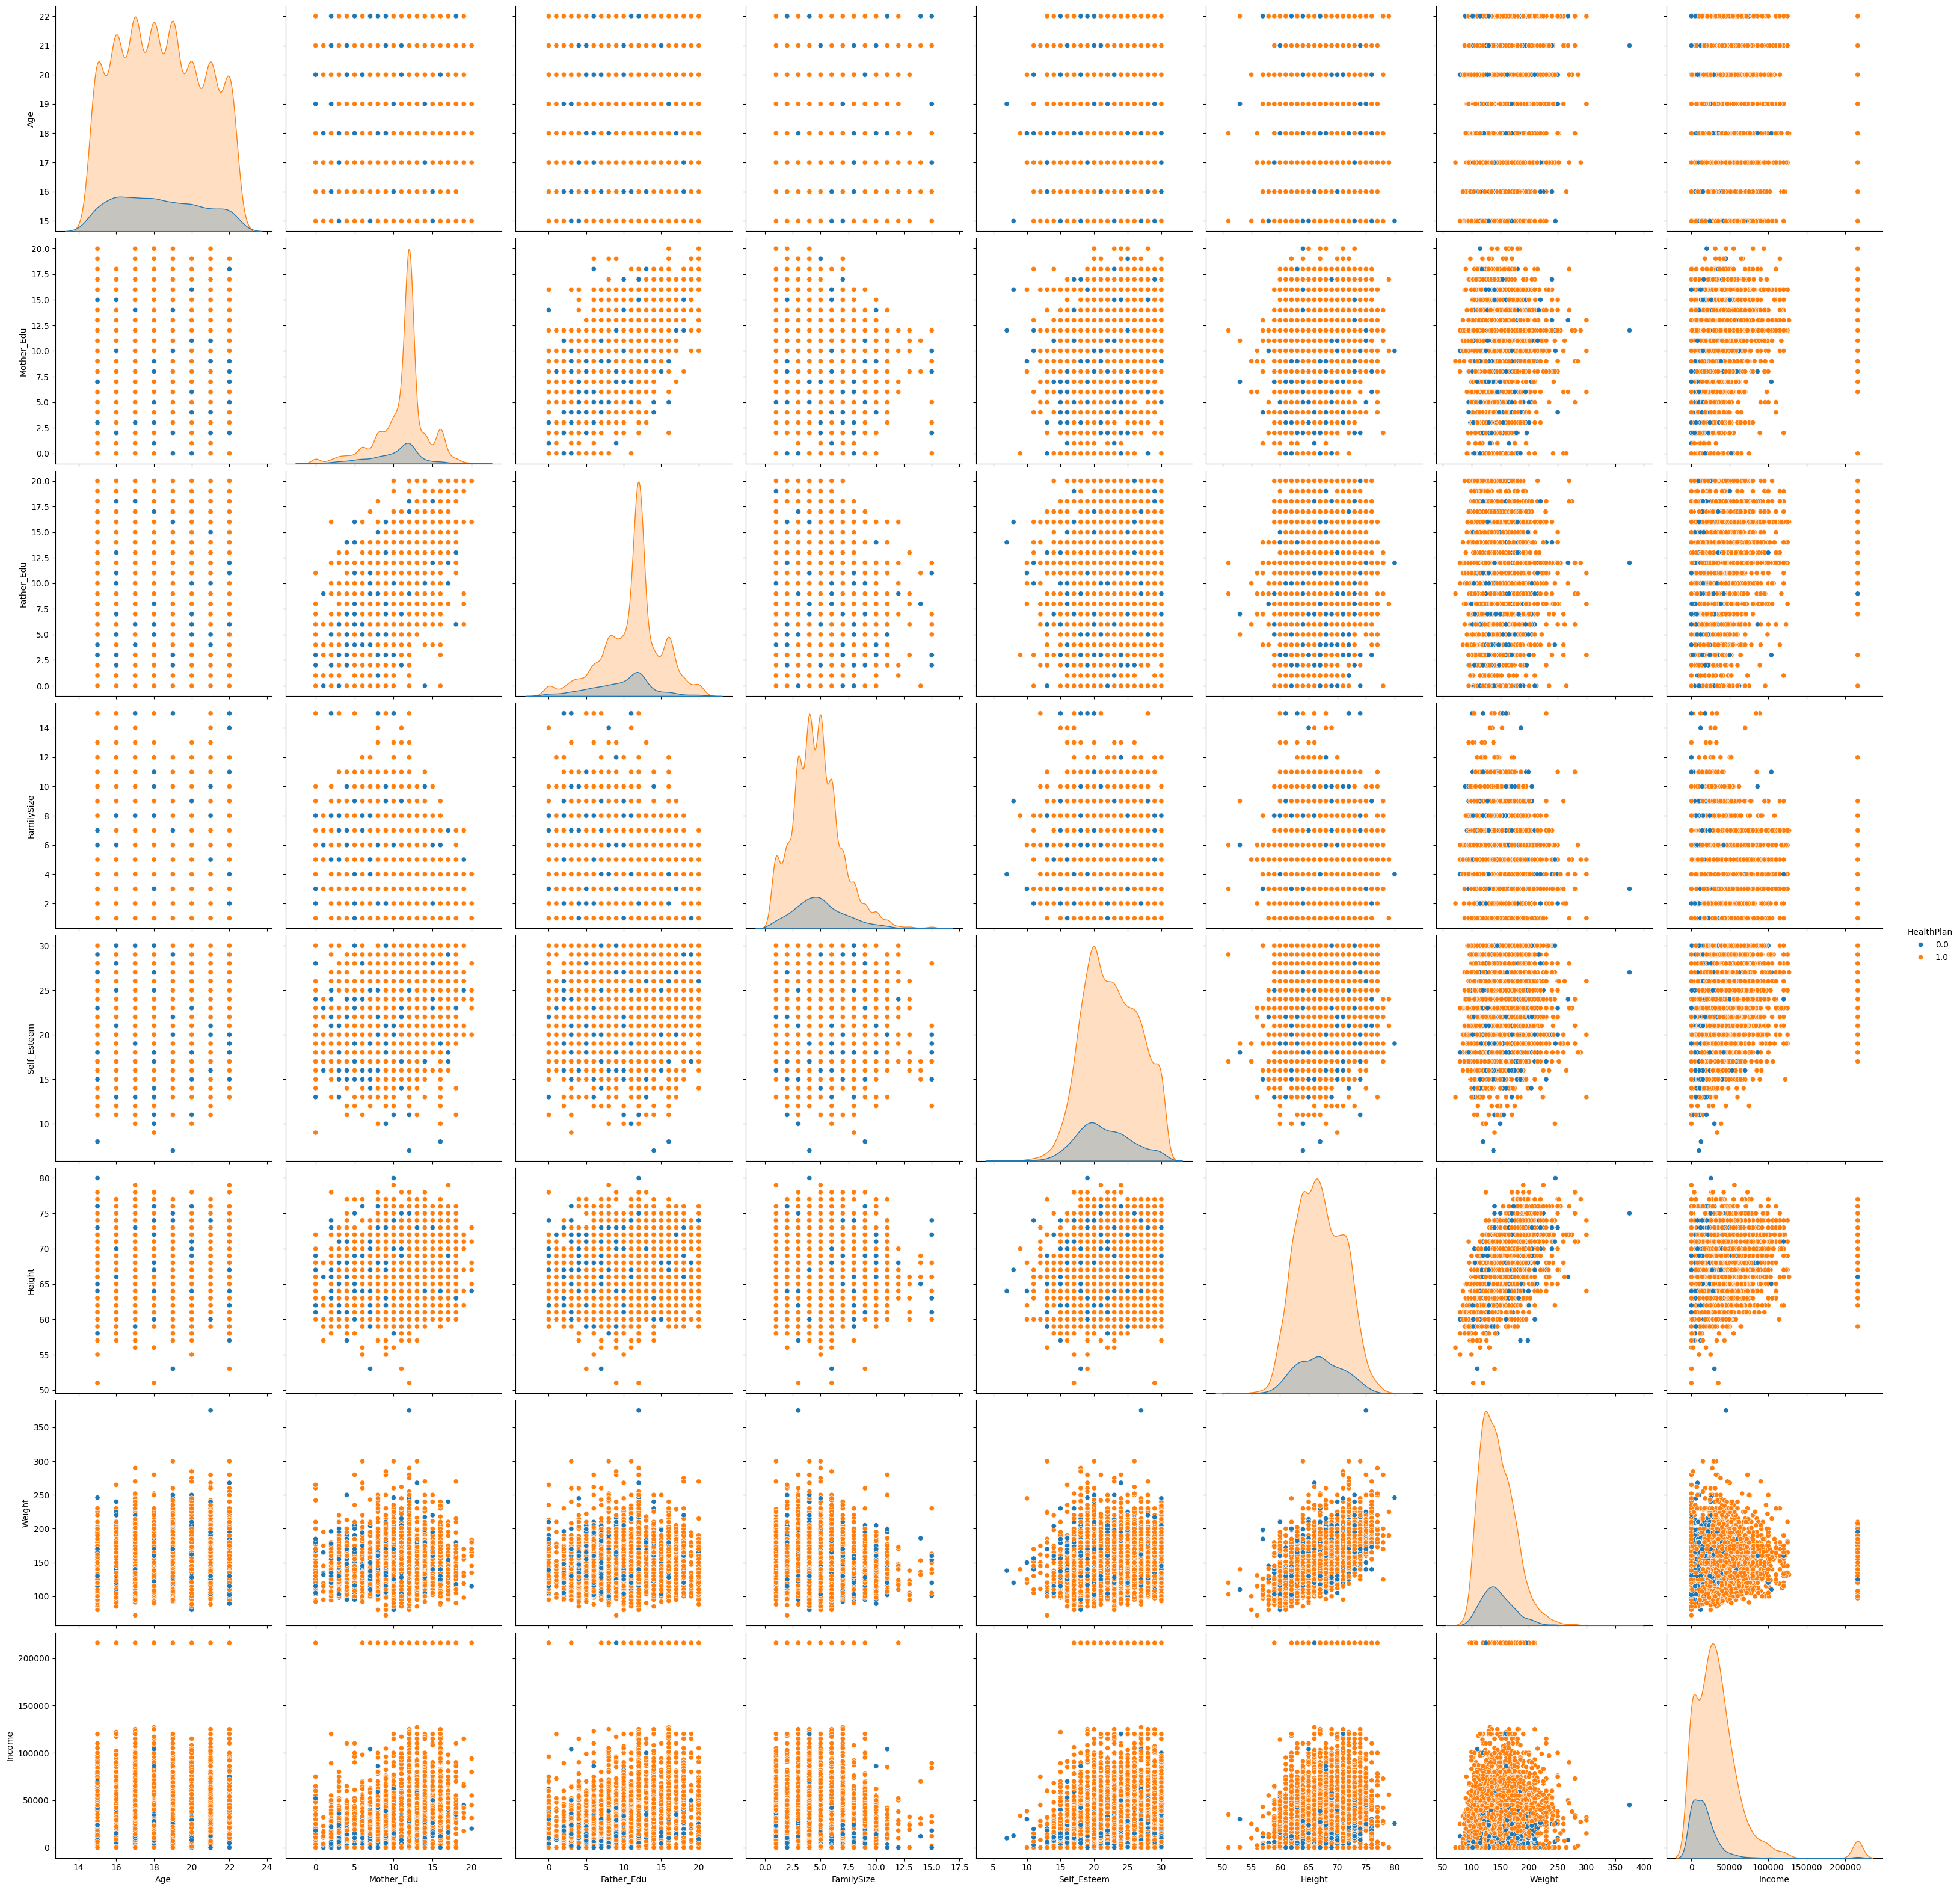

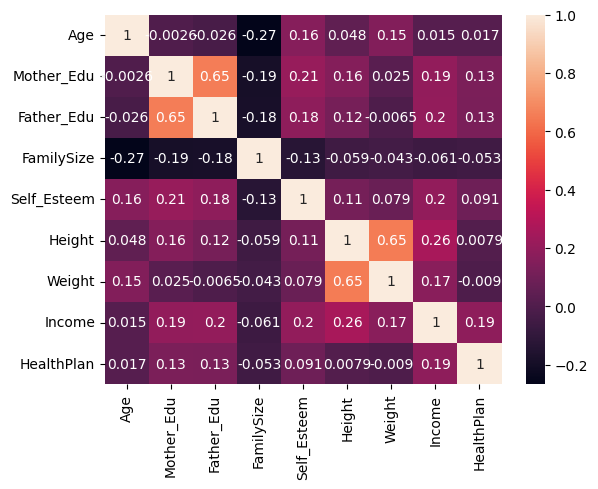

In [ ]:
nxl='/content/4. BD1_Longitudinal Survey_L_Int.xlsx'
XDB=pd.read_excel(nxl,sheet_name=0)

# Seleccionar las variables
XDB=XDB[['Age','Mother_Edu','Father_Edu','FamilySize','Self_Esteem','Height','Weight','Income','HealthPlan']]

XDB = XDB.dropna()
display(XDB)

#Para mirar correlaciones y variables importantes
plt.figure
sns.pairplot(XDB,hue='HealthPlan',size=4, vars=['Age','Mother_Edu','Father_Edu','FamilySize','Self_Esteem','Height','Weight','Income'])
plt.show()

#¿Cuáles son las correlaciones?
plt.figure
sns.heatmap(XDB.corr(),annot=True)
plt.show()




Modelo

In [ ]:
XD=XDB[['Age','Mother_Edu','Father_Edu','FamilySize','Self_Esteem','Height','Weight','Income']]
yd=XDB['HealthPlan']

#Se van a crea 5 montoncitos de datos
np.random.seed(42)
nc=5
mkm=KMeans(n_clusters=nc,random_state=42)
mkm.fit(XD,yd)
centroids=mkm.cluster_centers_
print("Los centroides son:\n",centroids)

#Como quedaron clasificadas las personas
labels=mkm.labels_
XDB['labels']=labels #Adicione a la tabla el cluster al que pertenece un solicitante
display(XDB)

#caracterizamos los centroides
ND=np.bincount(labels)
print("El tamaño de los clusters es:\n",ND)
NApr=XDB.groupby('labels').agg({"HealthPlan":lambda x:(x==1).sum()})
NNeg=XDB.groupby('labels').agg({"HealthPlan":lambda x:(x==0).sum()})
print("El número de personas con seguro medico por cluster es:\n",NApr)
print("El número de personas si seguro medico por cluster es:\n",NNeg)

#Se procede con la estimación de los porcentajes de preaprobación
NApr['HealthPlan']=NApr['HealthPlan']/ND
NNeg['HealthPlan']=NNeg['HealthPlan']/ND
print("El porcentaje de personas con seguro medico por cluster es:\n",NApr)
print("El porcentaje de personas sin seguro medico por cluster es:\n",NNeg)

Los centroides son:
 [[1.83844953e+01 1.05624350e+01 1.03740895e+01 4.85744017e+00
  2.15744017e+01 6.56841831e+01 1.39278356e+02 5.05316077e+03]
 [1.83605341e+01 1.17225519e+01 1.18271513e+01 4.49480712e+00
  2.33553412e+01 6.83857567e+01 1.52704748e+02 5.06523991e+04]
 [1.86324786e+01 1.32564103e+01 1.37521368e+01 4.32478632e+00
  2.48974359e+01 6.96923077e+01 1.60435897e+02 2.16200000e+05]
 [1.83249776e+01 1.07793196e+01 1.06347359e+01 4.73410922e+00
  2.22484333e+01 6.67479857e+01 1.44551477e+02 2.68872386e+04]
 [1.84005848e+01 1.25643275e+01 1.32134503e+01 4.41812865e+00
  2.43216374e+01 6.92192982e+01 1.55350877e+02 9.06077690e+04]]


,Age,Mother_Edu,Father_Edu,FamilySize,Self_Esteem,Height,Weight,Income,HealthPlan,labels
1,20,5.0,8.0,5,16.0,62.0,120.0,0.0,1.0,0
5,19,12.0,12.0,4,27.0,64.0,200.0,40000.0,1.0,1
6,15,12.0,12.0,3,26.0,65.0,131.0,25000.0,1.0,3
7,21,9.0,6.0,3,23.0,65.0,179.0,27400.0,1.0,3
8,16,12.0,10.0,6,26.0,66.0,145.0,52000.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...
12557,20,12.0,12.0,5,20.0,60.0,110.0,1000.0,1.0,0
12565,20,12.0,11.0,2,24.0,63.0,152.0,38000.0,1.0,3
12647,21,16.0,12.0,1,30.0,70.0,180.0,43600.0,1.0,1
12651,21,16.0,16.0,1,27.0,73.0,170.0,40000.0,1.0,1


El tamaño de los clusters es:
 [1922 1348  117 2234  342]
El número de personas con seguro medico por cluster es:
         HealthPlan
labels            
0             1418
1             1297
2              112
3             1948
4              335
El número de personas si seguro medico por cluster es:
         HealthPlan
labels            
0              504
1               51
2                5
3              286
4                7
El porcentaje de personas con seguro medico por cluster es:
         HealthPlan
labels            
0         0.737773
1         0.962166
2         0.957265
3         0.871979
4         0.979532
El porcentaje de personas sin seguro medico por cluster es:
         HealthPlan
labels            
0         0.262227
1         0.037834
2         0.042735
3         0.128021
4         0.020468


In [ ]:
ydp=np.zeros((len(XD),1))
Vapr=np.array(NApr);Vneg=np.array(NNeg)


for k in range(len(XD)):
  napr=labels[k]

  print("La persona :",k)
  print("El cluster al que pertenece es:",napr)
  print("El porcentaje de personas con seguro medico es:",Vapr[napr])
  print("El porcentaje de personas sin seguro medico es:",Vneg[napr])
  #Consolidamos la información de los Aprobados y Negados
  if Vapr[napr]>=Vneg[napr]:
    ydp[k]=1
  else:
    ydp[k]=0




Streaming output truncated to the last 5000 lines.
La persona : 4713
El cluster al que pertenece es: 3
El porcentaje de personas con seguro medico es: [0.87197851]
El porcentaje de personas sin seguro medico es: [0.12802149]
La persona : 4714
El cluster al que pertenece es: 2
El porcentaje de personas con seguro medico es: [0.95726496]
El porcentaje de personas sin seguro medico es: [0.04273504]
La persona : 4715
El cluster al que pertenece es: 4
El porcentaje de personas con seguro medico es: [0.97953216]
El porcentaje de personas sin seguro medico es: [0.02046784]
La persona : 4716
El cluster al que pertenece es: 3
El porcentaje de personas con seguro medico es: [0.87197851]
El porcentaje de personas sin seguro medico es: [0.12802149]
La persona : 4717
El cluster al que pertenece es: 0
El porcentaje de personas con seguro medico es: [0.73777315]
El porcentaje de personas sin seguro medico es: [0.26222685]
La persona : 4718
El cluster al que pertenece es: 3
El porcentaje de personas c

# Evaluar el modelo


In [ ]:
#Se evalua el modelo
cm=confusion_matrix(yd,ydp)
print("La matriz de confusión es:\n",cm)
VP=cm[1,1]
VN=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]

sensibilidad=VP/(VP+FN)
print("La sensibilidad del modelo es:",sensibilidad)
especificidad=VN/(VN+FP)
print("La especificidad del modelo es:",especificidad)

exactitud=(VP+VN)/(VP+VN+FP+FN)
print("La exactitud del modelo es:",exactitud)
sensibilidad=VP/(VP+FN)
print("La sensibilidad del modelo es:",sensibilidad)
especificidad=VN/(VN+FP)
print("La especificidad del modelo es:",especificidad)
precision=VP/(VP+FP)
print("La precisión del modelo es:",precision)
TasaError=(FP+FN)/(VP+VN+FP+FN)
print("La tasa de error del modelo es:",TasaError)
PredNeg=VN/(VN+FN)
print("La tasa de predicción negativa del modelo es:",PredNeg)

La matriz de confusión es:
 [[   0  853]
 [   0 5110]]
La sensibilidad del modelo es: 1.0
La especificidad del modelo es: 0.0
La exactitud del modelo es: 0.8569511990608754
La sensibilidad del modelo es: 1.0
La especificidad del modelo es: 0.0
La precisión del modelo es: 0.8569511990608754
La tasa de error del modelo es: 0.14304880093912462
La tasa de predicción negativa del modelo es: nan


<ipython-input-48-0399130bc6d6>:24: RuntimeWarning: invalid value encountered in scalar divide
  PredNeg=VN/(VN+FN)


In [ ]:
XDn=([(18,12,12,5,28,71,180,48000)])
ydn=mkm.predict(XDn)
print("La persona pertenece al cluster:", mkm.predict(XDn))
print("El porcentaje de personas con seguro medico es:",Vapr[ydn])
print("El porcentaje de personas sin seguro medico es:",Vneg[ydn])


La persona pertenece al cluster: [1]
El porcentaje de personas con seguro medico es: [[0.96216617]]
El porcentaje de personas sin seguro medico es: [[0.03783383]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


# Análisis de Resultados

Para la clasificación de datos mediante el método de clusterización, se tomaron un total de 8 variables socioeconómicas de entrada: Age, Mother_Edu, Father_Edu, FamilySize, Self_Esteem, Height, Weight, Income. La variable explicativa utilizada fue la pronosticacion de si una persona o no, posee un plan de salud (Health Plan).

A partir del análisis de correlación, se encontró que la variable con mayor relación con los demás atributos fue Income, lo que sugiere que esta variable es un factor determinante dentro de la segmentación de los datos. Además, se observó una correlación significativa entre Height y Weight con un valor de 0.65, lo que indica una relación directa entre estas dos características.

La matriz de confusión obtenida mostró que el modelo clasificó correctamente todos los casos positivos, pero falló en la identificación de los casos negativos:

La sensibilidad es de 1.0 (100%), lo que indica que el modelo identificó correctamente todas las instancias positivas. La Especificidad es de 0.0 (0%), esto nos indica que no logró identificar correctamente ninguna instancia negativa.

En cuanto a las Exactitud es de 85.69%, lo que sugiere un buen desempeño en términos generales, aunque con sesgo hacia una de las clases. Y con unas Precisión de 85.69%, lo que indica que, de todas las instancias clasificadas como positivas, el 85.69% fueron realmente positivas.Y por ultimo, se tiene una Tasa de error de 14.3%, representando los casos en los que el modelo no clasificó correctamente.

